In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = 'subredditoftheday_reddit.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,Join the official /r/SubredditOfTheDay Discord!,44,8jf2yn,subredditoftheday,https://discord.gg/FBZQu58,30,NaN,1.526326e+09,2018-05-14 21:26:55
1,"September 2nd, 2021 - /r/gallifreyan: and sudd...",202,pgif2m,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,17,## r/gallifreyan\n**7329** *Whovians* for **9 ...,1.630591e+09,2021-09-02 15:58:04
2,"August 26th, 2021 - /r/pocketsand: Repost Augu...",271,pc54p9,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,1,"#/r/pocketsand\n\n**46,500** readers for **9 y...",1.630002e+09,2021-08-26 20:12:06
3,"August 24th, 2021 - /r/cospenis: Disneyland fo...",429,payn7b,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,63,"##r/cospenis\n\n**27,483** *penis costume love...",1.629847e+09,2021-08-25 01:08:59
4,"August 6th, 2021 - /r/WildArt: Artwork depicti...",179,ozh7wy,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,12,"#### /r/wildart\n\n\n**4,377** *admirers of na...",1.628289e+09,2021-08-07 00:35:24


### Calculation of Enggagement Score

`Engagement Score = (NumComments * 0.4) + (AvgCommentLength * 0.3) + (AvgScore * 0.3)`

Higher Weight is given to the number of comments 


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Drop rows with any missing values
data_cleaned = data.dropna()

# Display the shape of the cleaned dataset
cleaned_shape = data_cleaned.shape


# Function to extract subreddit name from the title
def extract_subreddit(title):
    import re
    match = re.search(r'/r/(\w+)', title)
    return f'/r/{match.group(1)}' if match else None

# Apply the function to the title column to create a new subreddit column
data['subreddit'] = data['title'].apply(extract_subreddit)

missing_values, cleaned_shape
data_cleaned

,title,score,id,subreddit,url,num_comments,body,created,timestamp
1,"September 2nd, 2021 - /r/gallifreyan: and sudd...",202,pgif2m,/r/gallifreyan,https://www.reddit.com/r/subredditoftheday/com...,17,## r/gallifreyan\n**7329** *Whovians* for **9 ...,1.630591e+09,2021-09-02 15:58:04
2,"August 26th, 2021 - /r/pocketsand: Repost Augu...",271,pc54p9,/r/pocketsand,https://www.reddit.com/r/subredditoftheday/com...,1,"#/r/pocketsand\n\n**46,500** readers for **9 y...",1.630002e+09,2021-08-26 20:12:06
3,"August 24th, 2021 - /r/cospenis: Disneyland fo...",429,payn7b,/r/cospenis,https://www.reddit.com/r/subredditoftheday/com...,63,"##r/cospenis\n\n**27,483** *penis costume love...",1.629847e+09,2021-08-25 01:08:59
4,"August 6th, 2021 - /r/WildArt: Artwork depicti...",179,ozh7wy,/r/WildArt,https://www.reddit.com/r/subredditoftheday/com...,12,"#### /r/wildart\n\n\n**4,377** *admirers of na...",1.628289e+09,2021-08-07 00:35:24
5,"August 8th, 2021 - /r/PaperTowns: Illustration...",240,oyty8q,/r/PaperTowns,https://www.reddit.com/r/subredditoftheday/com...,3,"####**/r/PaperTowns**\n\n**106,871** subscribe...",1.628204e+09,2021-08-06 00:55:56
...,...,...,...,...,...,...,...,...,...
994,"November 29th, 2017 - /r/ATBGE: When fine craf...",431,7gd2n5,/r/ATBGE,https://www.reddit.com/r/subredditoftheday/com...,5,"####/r/ATBGE \n\n\n**311, 372** subscribers fo...",1.511960e+09,2017-11-29 14:00:37
995,"November 28th, 2017 - /r/DemocracyExperiment: ...",200,7g3yza,/r/DemocracyExperiment,https://www.reddit.com/r/subredditoftheday/com...,13,### /r/DemocracyExperiment\n\n\n\n**267** Citi...,1.511874e+09,2017-11-28 14:00:36
996,"November 27th, 2017 - /r/de: Reddit in German",440,7fv021,/r/de,https://www.reddit.com/r/subredditoftheday/com...,60,"#### /r/de\n\n**81,954** Leser for **11 Year...",1.511788e+09,2017-11-27 14:00:37
997,"November 26th, 2017 - /r/Geoism: Conquer the w...",140,7fmra0,/r/Geoism,https://www.reddit.com/r/subredditoftheday/com...,12,"####/r/Geosim \n\n**1,096** political revolut...",1.511701e+09,2017-11-26 14:00:37


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ... (previous code to load and clean data, extract subreddit names)

# Calculate metrics per subreddit
num_comments = data_cleaned.groupby('subreddit')['num_comments'].mean()
data_cleaned['comment_length'] = data_cleaned['body'].apply(len)
avg_comment_length = data_cleaned.groupby('subreddit')['comment_length'].mean()
avg_score = data_cleaned.groupby('subreddit')['score'].mean()

# Normalize the metrics
scaler = MinMaxScaler()
normalized_metrics = pd.DataFrame({
    'NumComments': scaler.fit_transform(num_comments.values.reshape(-1, 1)).flatten(),
    'AvgCommentLength': scaler.fit_transform(avg_comment_length.values.reshape(-1, 1)).flatten(),
    'AvgScore': scaler.fit_transform(avg_score.values.reshape(-1, 1)).flatten()
}, index=num_comments.index) # Use subreddit names as index

# Calculate engagement score
normalized_metrics['EngagementScore'] = (
    normalized_metrics['NumComments'] * 0.4 +
    normalized_metrics['AvgCommentLength'] * 0.3 +
    normalized_metrics['AvgScore'] * 0.3
)

# Get top 5 subreddits by engagement score
top_5_subreddits = normalized_metrics.sort_values(by='EngagementScore', ascending=False).head(5)

# Print the top 5 subreddits with their scores
print(top_5_subreddits[['EngagementScore']]) 


                          EngagementScore
subreddit                                
/r/FragileWhiteRedditor          0.445013
/r/wallstreetbets                0.444708
/r/Dota2                         0.334715
/r/ThanosDidNothingWrong         0.294853
/r/Pokemon                       0.289744


/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_67598/441373576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['comment_length'] = data_cleaned['body'].apply(len)


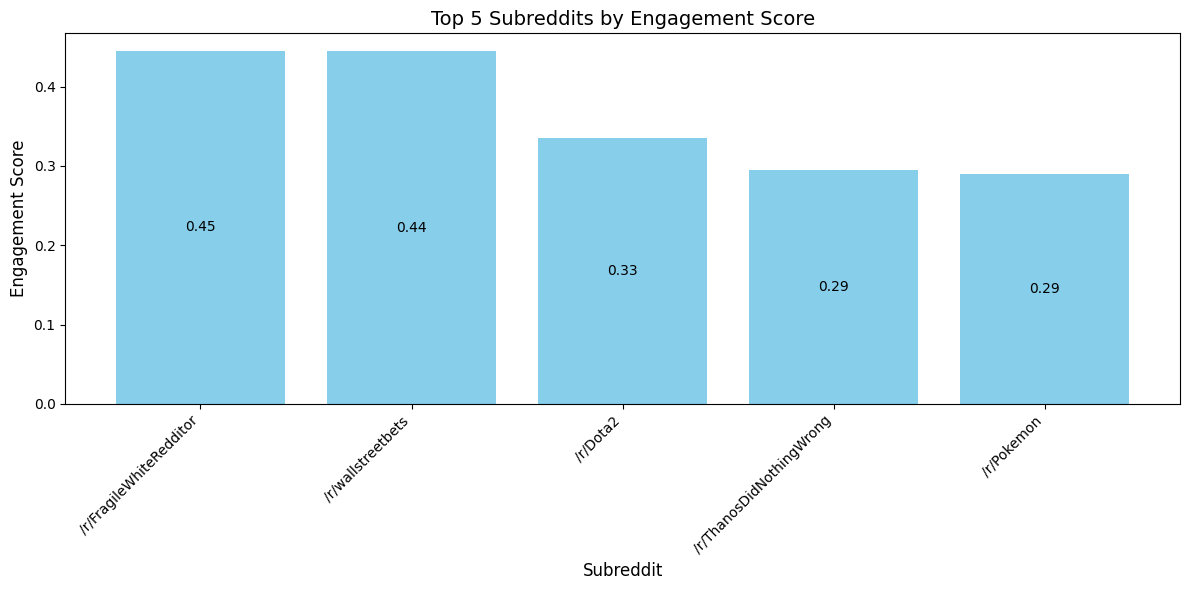

In [19]:
# --- Plotting the top 5 subreddits ---

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create the bar plot
bars = plt.bar(top_5_subreddits.index, top_5_subreddits['EngagementScore'], color='skyblue')

# Add labels and title
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.title('Top 5 Subreddits by Engagement Score', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add y-values inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{height:.2f}',
             ha='center', va='center')

# Show the plot
plt.tight_layout() 
plt.show()